The house price project is an ongoing competition on kaggle. The dataset contains every aspect of residential homes in Ames, Iowa. The objective of the project is to predict the final price of each home. What features of the house has the most variation on the house price? We will investigate feature engineering techniques such Random Forest and Gradient Boosting to find the features that has the most variation on the house price.
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard#Data-Processing

Here is the run down process for the project.
Clean the data
Split and Test data
Exploratory Data Analysis
Plot Relationship
Feature Engineering
Best Model
Fit Models
Train Predict/ an Score/ on Test
Refining models

# Obtainging the data

In [25]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import norm
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)



In [2]:
# Reading in the data
house_train_data = pd.read_csv('train.csv')
house_test_data = pd.read_csv('test.csv')
house_sample_data = pd.read_csv('sample_submission.csv')
house_train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
house_sample_data.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [5]:
house_train_data['LandSlope']

0       Gtl
1       Gtl
2       Gtl
3       Gtl
4       Gtl
5       Gtl
6       Gtl
7       Gtl
8       Gtl
9       Gtl
10      Gtl
11      Gtl
12      Gtl
13      Gtl
14      Gtl
15      Gtl
16      Gtl
17      Gtl
18      Gtl
19      Gtl
20      Gtl
21      Gtl
22      Gtl
23      Gtl
24      Gtl
25      Gtl
26      Gtl
27      Gtl
28      Gtl
29      Gtl
       ... 
1430    Gtl
1431    Gtl
1432    Gtl
1433    Gtl
1434    Mod
1435    Gtl
1436    Gtl
1437    Gtl
1438    Gtl
1439    Gtl
1440    Mod
1441    Gtl
1442    Gtl
1443    Gtl
1444    Gtl
1445    Gtl
1446    Gtl
1447    Gtl
1448    Gtl
1449    Gtl
1450    Gtl
1451    Gtl
1452    Gtl
1453    Gtl
1454    Gtl
1455    Gtl
1456    Gtl
1457    Gtl
1458    Gtl
1459    Gtl
Name: LandSlope, Length: 1460, dtype: object

In [6]:
house_train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Check the decoration
house_train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(house_train_data.shape))
print("The test data size before dropping Id feature is : {} ".format(house_test_data.shape))


The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


In [9]:
#Save the 'Id' column
train_ID = house_train_data['Id']
test_ID = house_test_data['Id']

In [10]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
house_train_data.drop("Id", axis = 1, inplace = True)
house_test_data.drop("Id", axis = 1, inplace = True)


In [11]:
#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(house_train_data.shape)) 
print("The test data size after dropping Id feature is : {} ".format(house_test_data.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


# Exploring Outliers


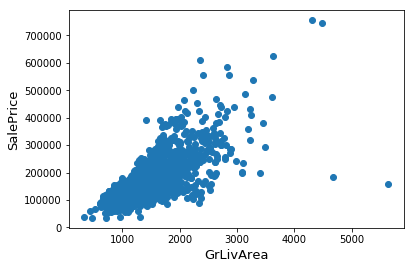

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = house_train_data['GrLivArea'], y = house_train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We can see that we have some outliers at the bottom right and data points are following the same trend with the other data points. So we will classify those two points as outlier and we will go ahead and delete them.

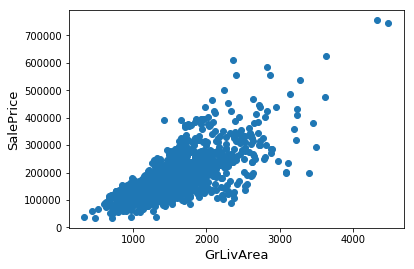

In [16]:
#Deleting outliers
training_data = house_train_data.drop(house_train_data[(house_train_data['GrLivArea']>4000) & (house_train_data['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(training_data['GrLivArea'], training_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# Exploring the predictive variable


 mu = 180932.92 and sigma = 79467.79



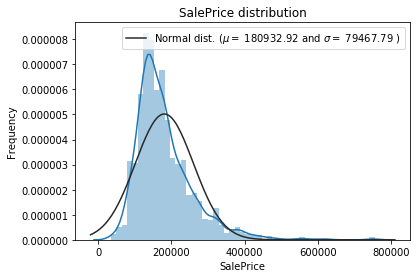

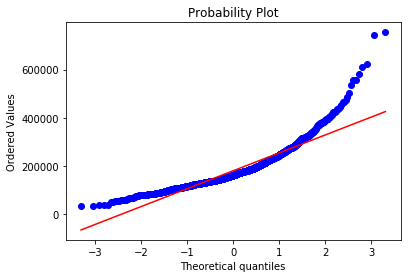

In [19]:
sns.distplot(training_data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(training_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(training_data['SalePrice'], plot=plt)
plt.show()

We see that the predictive variable is deviating from a normal distribution and it has a postive skewness and some peakedness. Lets look at skewness and kurtosis.To resolve the skewnwess of the predictive variable we use a log transformation.

In [20]:
print("Skewness: %f" % training_data['SalePrice'].skew())
print("Kurtosis: %f" % training_data['SalePrice'].kurt())

Skewness: 1.881296
Kurtosis: 6.523067



 mu = 2.57 and sigma = 0.03



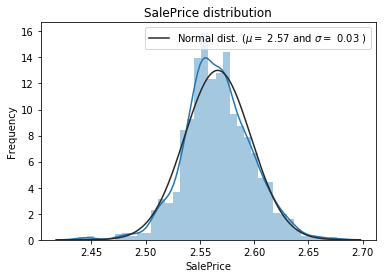

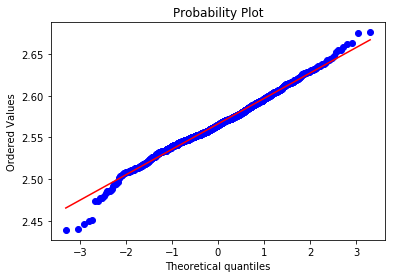

In [22]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
training_data["SalePrice"] = np.log1p(training_data["SalePrice"])

#Check the new distribution 
sns.distplot(training_data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(training_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(training_data['SalePrice'], plot=plt)
plt.show()

# Feature Engineering

In [29]:
# Since we have separate dataset for training and testing. We will combine those two datasets

ntrain = training_data.shape[0]
ntest = house_test_data.shape[0]
y_train = training_data.SalePrice.values
entire_data = pd.concat((training_data, house_test_data)).reset_index(drop=True)
entire_data.drop(['SalePrice'], axis=1, inplace=True)
print("entire_data size is : {}".format(all_data.shape))

entire_data size is : (2917, 79)


In [30]:
# Missing data
entire_data_na = (entire_data.isnull().sum() / len(entire_data)) * 100
entire_data_na = entire_data_na.drop(entire_data_na[entire_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :entire_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

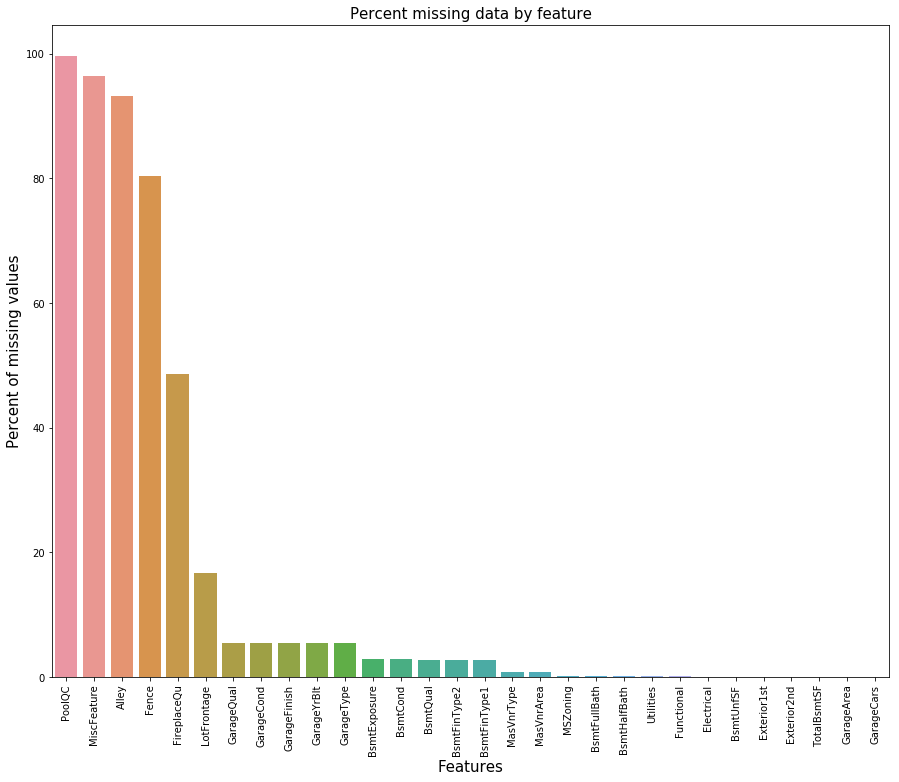

In [31]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=entire_data_na.index, y=entire_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [33]:
# Imputing missing values
entire_data["PoolQC"] = entire_data["PoolQC"].fillna("None")
entire_data["MiscFeature"] = entire_data["MiscFeature"].fillna("None")
entire_data["Alley"] = entire_data["Alley"].fillna("None")
entire_data["Fence"] = entire_data["Fence"].fillna("None")
entire_data["FireplaceQu"] = entire_data["FireplaceQu"].fillna("None")

LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.


In [34]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
entire_data["LotFrontage"] = entire_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [35]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    entire_data[col] = entire_data[col].fillna('None')

In [36]:
#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    entire_data[col] = entire_data[col].fillna(0)

In [37]:
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    entire_data[col] = entire_data[col].fillna(0)

In [38]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    entire_data[col] = entire_data[col].fillna('None')

In [39]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
entire_data["MasVnrType"] = entire_data["MasVnrType"].fillna("None")
entire_data["MasVnrArea"] = entire_data["MasVnrArea"].fillna(0)

In [40]:
# MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
entire_data['MSZoning'] = entire_data['MSZoning'].fillna(entire_data['MSZoning'].mode()[0])

In [41]:
# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
entire_data = entire_data.drop(['Utilities'], axis=1)

In [42]:
# Functional : data description says NA means typical
entire_data["Functional"] = entire_data["Functional"].fillna("Typ")

In [43]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
entire_data['Electrical'] = entire_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [44]:
# KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
entire_data['KitchenQual'] = entire_data['KitchenQual'].fillna(entire_data['KitchenQual'].mode()[0])


In [45]:
# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
entire_data['Exterior1st'] = entire_data['Exterior1st'].fillna(entire_data['Exterior1st'].mode()[0])
entire_data['Exterior2nd'] = entire_data['Exterior2nd'].fillna(entire_data['Exterior2nd'].mode()[0])


In [46]:
# SaleType : Fill in again with most frequent which is "WD"
entire_data['SaleType'] = entire_data['SaleType'].fillna(entire_data['SaleType'].mode()[0])


In [47]:
# MSSubClass : Na most likely means No building class. We can replace missing values with None
entire_data['MSSubClass'] = entire_data['MSSubClass'].fillna("None")


In [ ]:
#Check remaining missing values if any 
entire_data_na = (entire_data.isnull().sum() / len(entire_data)) * 100
entire_data_na = entire_data_na.drop(entire_data_na[entire_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :entire_data_na})
missing_data.head()

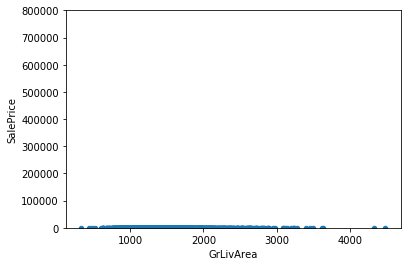

In [23]:
#Lets investigate the relationship between the predictive variable 'SalePrice' and indenpendent numeric features
var ='GrLivArea'
data = pd.concat([training_data['SalePrice'], training_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We see that SalePrice and GrLivArea which is the above grade(ground)living area square feet has a positive linear relationship which means as the mumber of square feet of GrLivArea increase the SalePrice increases as well.Now lets take a look at the relation between 'TotalBsmtSF' and 'SalePrice'

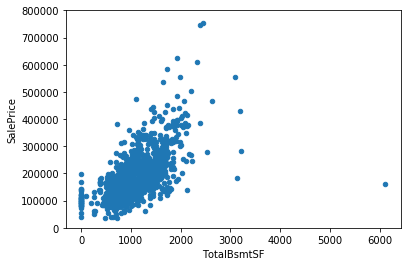

In [14]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([house_train_data['SalePrice'], house_train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


We will now take at a relationship with categorical features

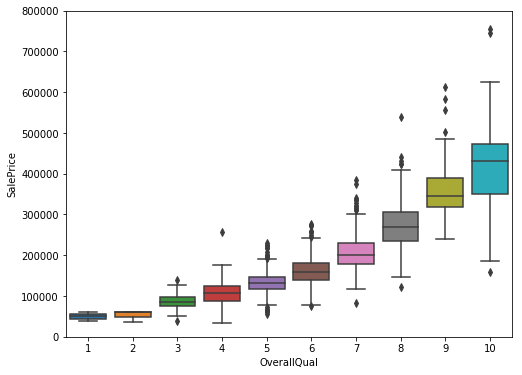

In [15]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([house_train_data['SalePrice'], house_train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

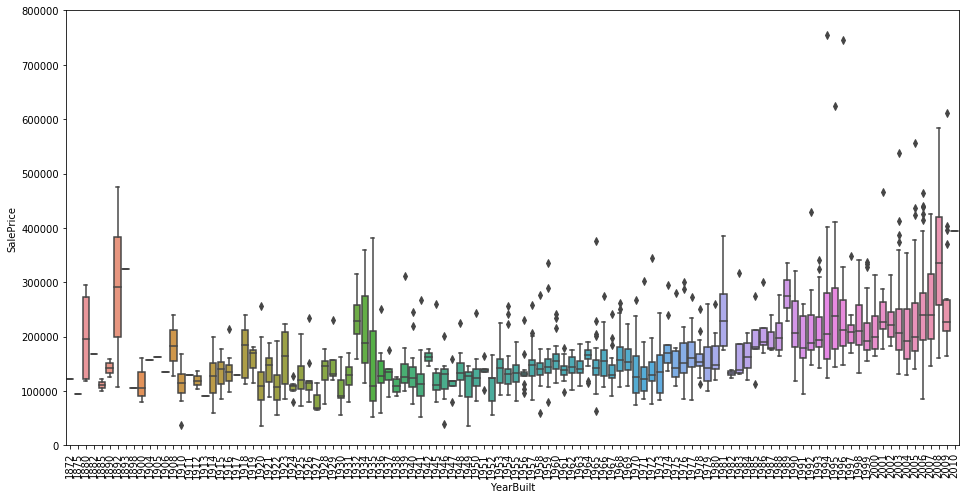

In [16]:
var = 'YearBuilt'
data = pd.concat([house_train_data['SalePrice'], house_train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

We have analyzed four variables and the dataset has alot more other variable that we need to analyzed. The strategy we are going to use here is identify feature variables that needs to be considered for further analysis. We are going to use feature engineering to identify the qualifying feature variable for futher analysis.We will now explore the data using correlation matrix, SalePrice correlation matrix and use scatter plots between the most correlated variables

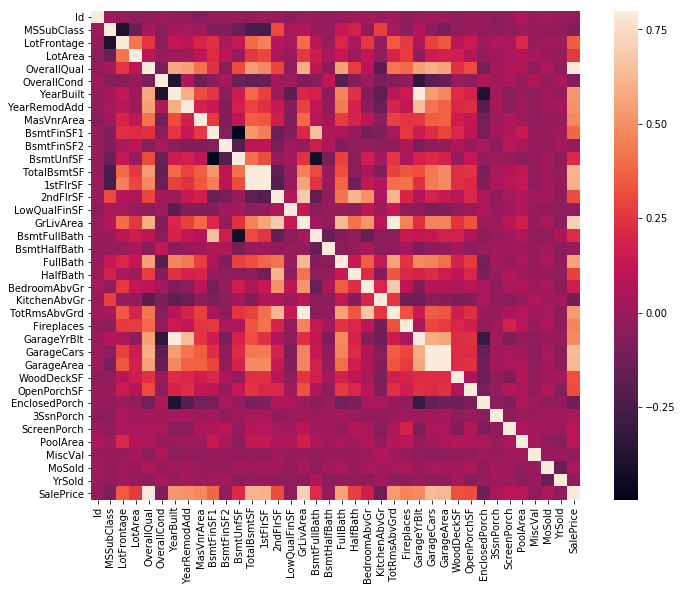

In [17]:
#correlation matrix
corrmat = house_train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Look at the correlation heatmap we can draw attention on 'TotalBsmtSF' and "1stFlrSF" variables.We see significant correlation between these variables. There is a strong correlation that indicate a multicollinearity situation and this case applies to the variable 'GarageX'. When we investigate more on these variables they almost give the same information. Heatmaps are great for detecting this kind of situations.Lets dig in and evaluate SalePrice with 'GrLivArea','TotalNsmtSF'and 'OverallQual'

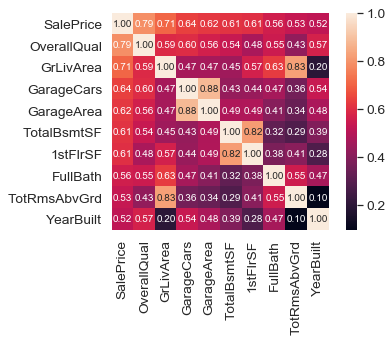

In [18]:
# This is a 'SalePrice' correlation matrix a zoomed in heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [19]:
We see from the heatmap above that 'GarageCars' and 'GarageArea' are some of the most correlated variables. The reason being the number of cars that fit into the garage is a consequence of the garage area.Therefore, we will keep 'GarageCars'since it has the most correlation to 'SalePrice'and we will get rid of 'GarageArea'.Between 'TotalBsmtSF' and '1stFloor'the same case is happening here so we will keep 'TotalBsmtSF'.

SyntaxError: invalid syntax (<ipython-input-19-2f88e467cdfa>, line 1)

C:\Users\abel.chisanga\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


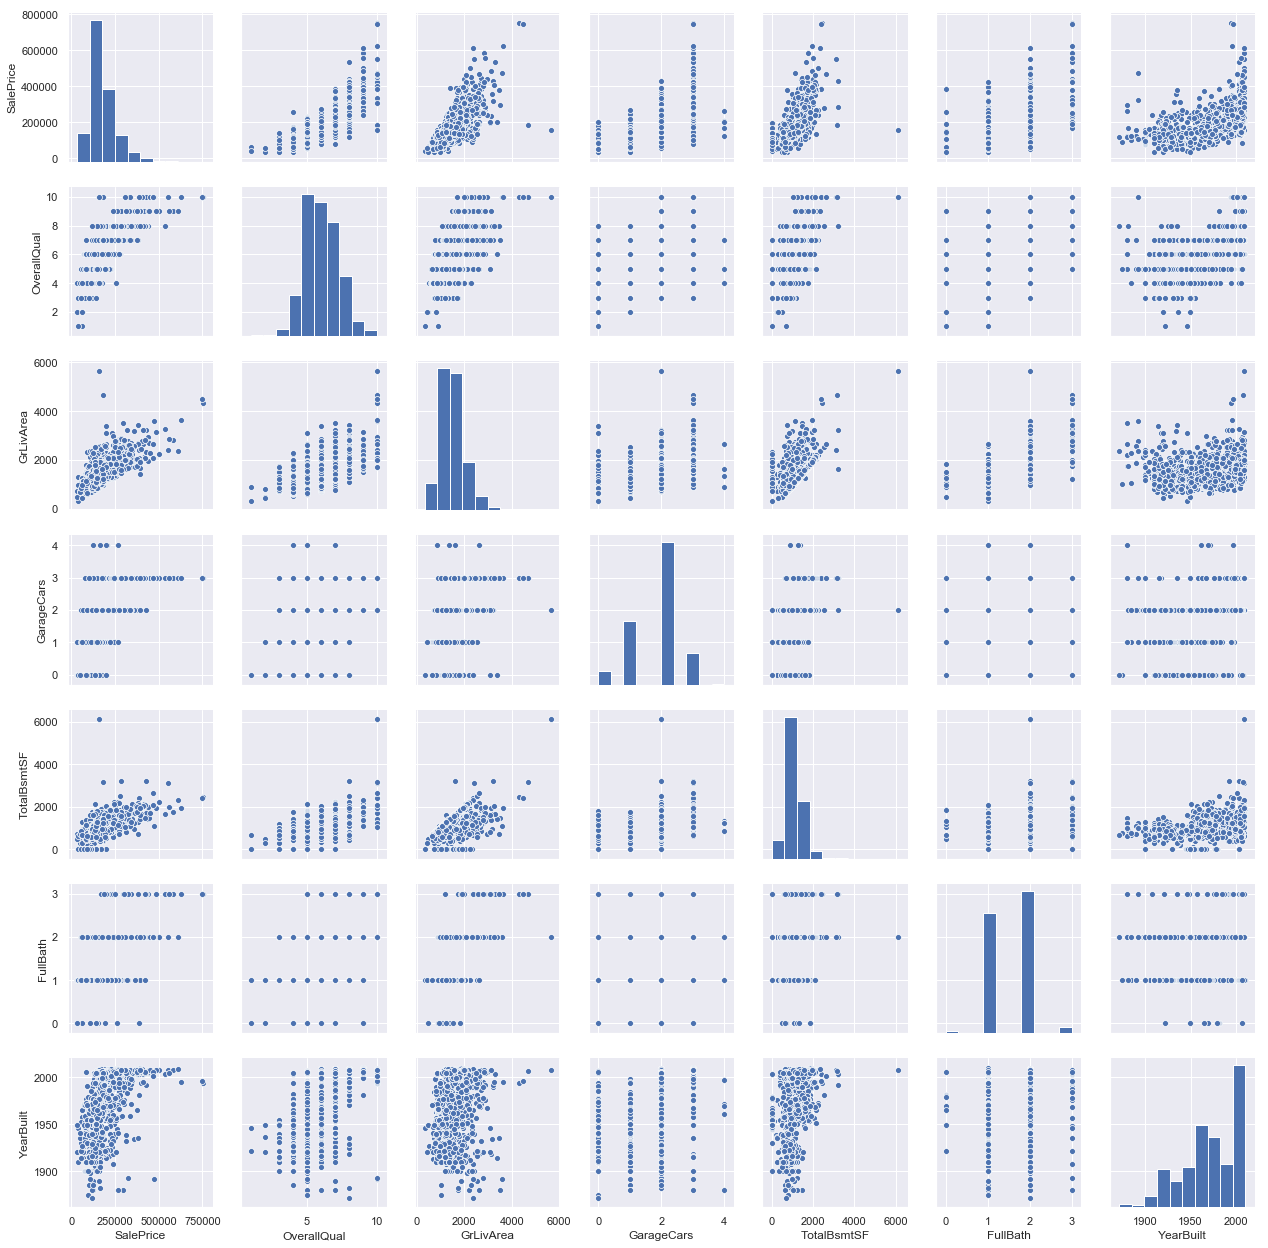

In [20]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house_train_data[cols], size = 2.5)
plt.show();

# Handling Missing Values

In [21]:
# Missing data
total = house_train_data.isnull().sum().sort_values(ascending=False)
percent = (house_train_data.isnull().sum()/house_train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


We will put a 15% threshold of missing data in a column. The column containing 15% of missing data must be delete.

In [32]:
#dealing with missing data
house_train_df = house_train_data.drop((missing_data[missing_data['Total'] > 1]).index,1)


In [35]:
house_train_df = house_train_df.drop(house_train_df.loc[house_train_df['Electrical'].isnull()].index)

In [37]:
# Checking for missing data
house_train_df.isnull().sum().max()

0

Here is what we did with the code above. We deleted all the variables with missing data except the variable 'Electrical'since this variable only contains one missing observation and we only deleted the mission data in the particular variable. Now we see that when we run a check on missing data the output is zero meaning we no longer have missing values in our dataset

# Dealing with outliers using Univariate and Bivariate Analysis

Univariate analysis: The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.



In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(house_train_df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


C:\Users\abel.chisanga\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\abel.chisanga\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Here is how the predictive variable looks. The low range values are similar and not too far from 0 and high range values are far from 0 and the 7.... values are really out of range.Now will not consider the 7... values as outliers but we will watching and be careful.

# Bivariate Analysis

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


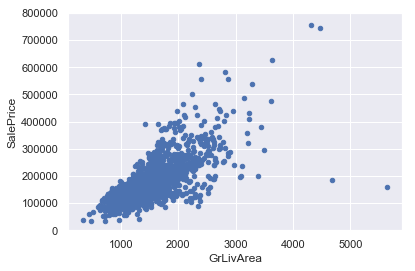

In [40]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([house_train_df['SalePrice'], house_train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

What do we see now? The two values with bigger 'GrLivArea' seems strange and they are not following the crowd. We can speculate why this is happening. Maybe the refer to agriculture area and that could explain the low price. That been the case will consider those points as outliers and delete them. The two observation on the top of the plot are those 7.... values we said we would be careful with. They look like two special cases, however they seem to be following the crowd. for that reason we will keep them. We can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.

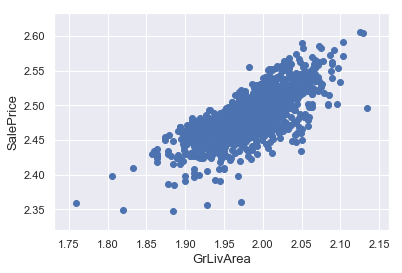

In [92]:
#Deleting outliers
house_train_df = house_train_df.drop(house_train_df [(house_train_df['GrLivArea']>4000) & (house_train_df['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(house_train_df['GrLivArea'], house_train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


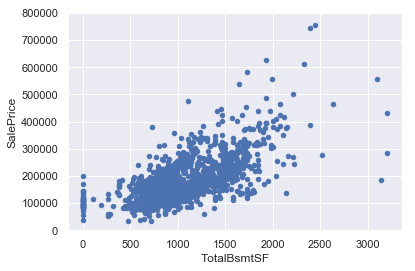

In [63]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([house_train_df['SalePrice'], house_train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We will not attempt to delete data points greator than 3000.We will not do anything to the variable TotalBsmtSF

# Data Normality

The point here is to test 'SalePrice' in a very lean way. In doing so we will be paying attention to histogram: kurtosis and skewness and normal probability plot which means data distribution should closely follow the diagonal that represents the normal distribution

In [66]:
import scipy.stats as stats
from scipy.stats import norm


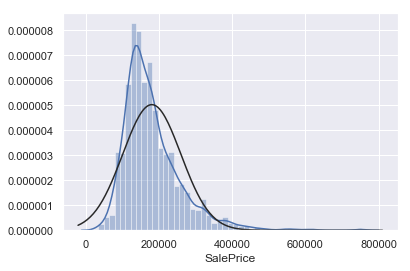

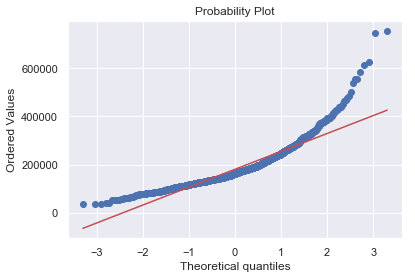

In [67]:
#histogram and normal probability plot
sns.distplot(house_train_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_train_df['SalePrice'], plot=plt)

We see that the predictive variable 'SalePrice' is normal. We also see 'peakedness', positive skewness and not following the diagonal line. Lets using log transformations to resolve positive skewness.

In [70]:
#applying log transformation
house_train_df['SalePrice'] = np.log(house_train_df['SalePrice'])

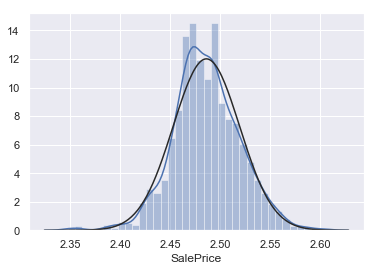

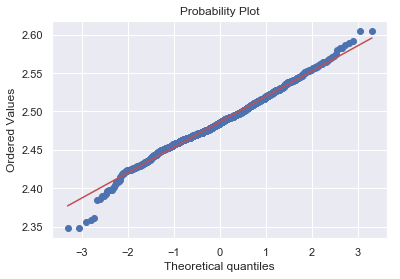

In [71]:
#transformed histogram and normal probability plot
sns.distplot(house_train_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_train_df['SalePrice'], plot=plt)

Perfect problem resolved. Now lets take look at the variable 'GrLivArea'

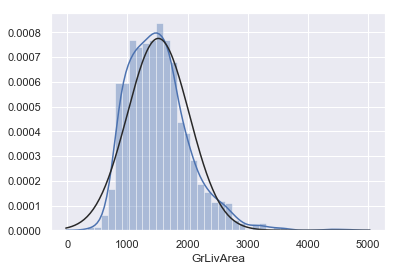

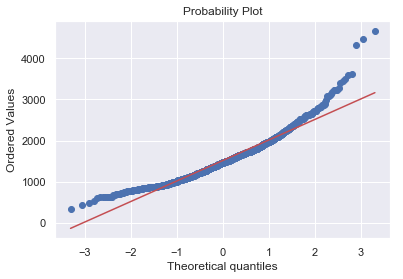

In [73]:
#histogram and normal probability plot
sns.distplot(house_train_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_train_df['GrLivArea'], plot=plt)


In [75]:
#data transformation
house_train_df['GrLivArea'] = np.log(house_train_df['GrLivArea'])


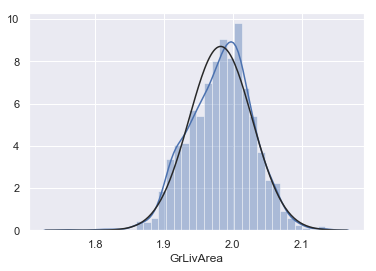

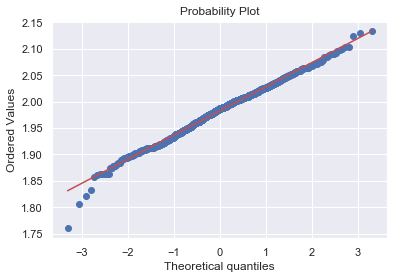

In [78]:
#transformed histogram and normal probability plot
sns.distplot(house_train_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_train_df['GrLivArea'], plot=plt)


In [ ]:
We will take look at variables 'TotalBsmSF','HasBsmt'

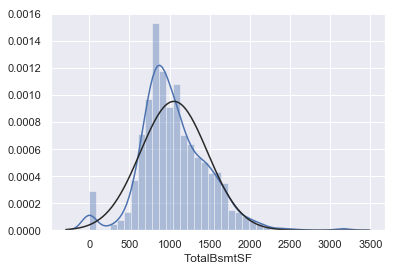

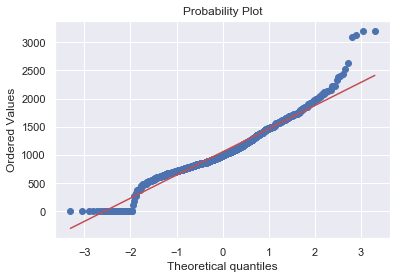

In [79]:
#histogram and normal probability plot
sns.distplot(house_train_df['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_train_df['TotalBsmtSF'], plot=plt)

We have alot of zeros in the variable and we cant use log transformation. To resolve this problem of zeros skewing the data. We will create a variable that can get the effect of having or not having basement() binary variable). after that we will do a log transformation to all the non-zero observations, ignoring those with value zero. Doing so will not lose the effect of having or not  basement.

In [82]:
#if area>0 it gets 1, for area==0 it gets 0
house_train_df['HasBsmt'] = pd.Series(len(house_train_df['TotalBsmtSF']), index=house_train_df.index)
house_train_df['HasBsmt'] = 0 
house_train_df.loc[house_train_df['TotalBsmtSF']>0,'HasBsmt'] = 1

In [83]:
#transform data
house_train_df.loc[house_train_df['HasBsmt']==1,'TotalBsmtSF'] = np.log(house_train_df['TotalBsmtSF'])

C:\Users\abel.chisanga\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


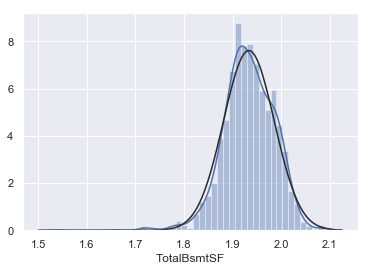

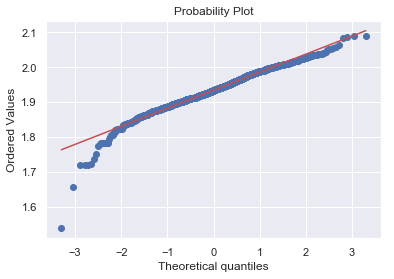

In [85]:
#histogram and normal probability plot
sns.distplot(house_train_df[house_train_df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_train_df[house_train_df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

# Testing Homoscedasticity

he best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

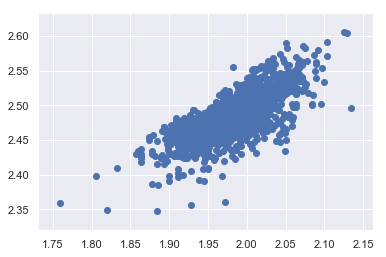

In [86]:
#scatter plot
plt.scatter(house_train_df['GrLivArea'], house_train_df['SalePrice']);

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check 'SalePrice' with 'TotalBsmtSF'.

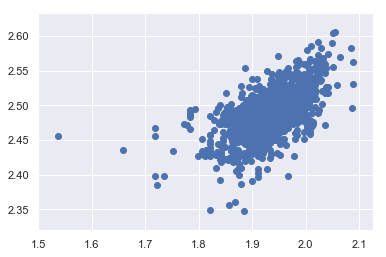

In [88]:
#scatter plot
plt.scatter(house_train_df[house_train_df['TotalBsmtSF']>0]['TotalBsmtSF'], house_train_df[house_train_df['TotalBsmtSF']>0]['SalePrice']);

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!

In [89]:
#convert categorical variable into dummy
house_train_df = pd.get_dummies(house_train_df)

In [94]:
# Concatenating the training and testing data
ntrain = house_train_df.shape[0]
ntest = house_test_data.shape[0]
y_train = house_train_df.SalePrice.values
all_data = pd.concat((house_train_df, house_test_data)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2913, 267)


C:\Users\abel.chisanga\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """
